In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

data_file = 'data2021-05-21 15-55-0.csv'

df = pd.read_csv(data_file)

df

,Time,Temperature set (C),Temperature measured (C)
0,0.122546,17.355533,20.558813
1,1.022247,17.355533,20.558813
2,2.021045,17.368001,20.470878
3,3.022159,17.368001,20.735894
4,4.022038,15.414005,20.441645
5,5.021162,15.425270,20.485505
6,6.020723,15.425270,20.485505
7,7.020907,15.436535,20.485505
8,8.021549,15.436535,20.485505
9,9.022213,15.391499,20.617665


In [62]:
window_size = 10
temp_set_rollling_avg= np.array(df.loc[:,'Temperature set (C)'].rolling(window = window_size, center = True).mean())
temp_measured_rollling_avg= np.array(df.loc[:,'Temperature measured (C)'].rolling(window = window_size, center = True).mean())

In [63]:
df['Temperature set (rolling mean) C'] = temp_set_rollling_avg
df['Temperature measured (rolling mean) C'] = temp_measured_rollling_avg

<IPython.core.display.Javascript object>


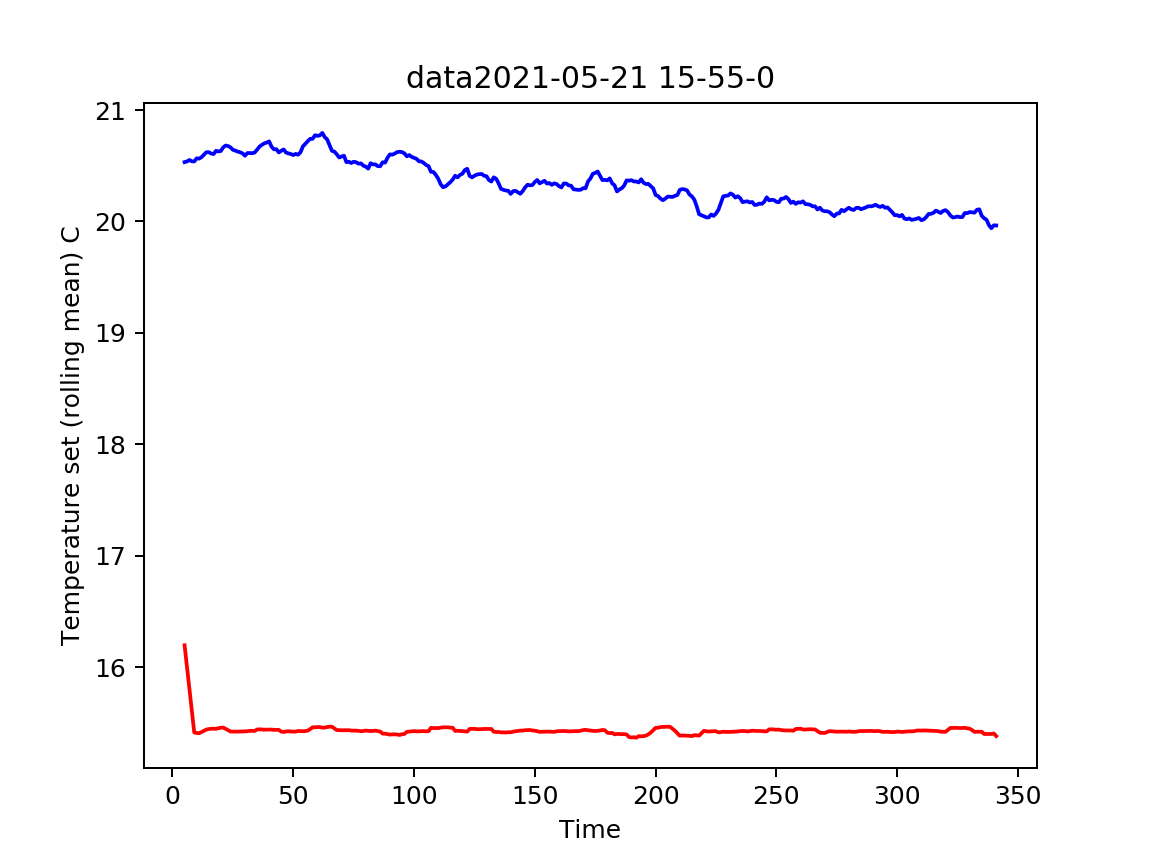

In [68]:
# Plot

plt.figure()
sns.lineplot(x = "Time", y = 'Temperature set (rolling mean) C', color = 'r', data =df)
sns.lineplot(x = "Time", y = 'Temperature measured (rolling mean) C', color = 'b', data = df)
plt.title(data_file[:-4])
plt.savefig(data_file[:-4]+'.png', dpi = 300)
plt.show()

In [73]:
# Fit a line to estimate slope
p = np.polyfit(np.array(df["Time"]), np.array(df["Temperature measured (C)"]), deg = 1)
print(p)

[-2.05700135e-03  2.06859616e+01]


In [53]:
# Heat transfer calculations
Cp = 1 # 1kJ/kg K
rho_air = 1.22 #
Volume = 0.141 # m^3
Delta_T = 4
Time = 200

In [54]:
total_heat = lambda volume, delta_t: 1000*rho_air*volume*Cp*delta_t # heat in Joules

In [55]:
heat_transfer_rate = total_heat(Volume, Delta_T)/Time

In [56]:
print('Heat transfer rate: {} W'.format(heat_transfer_rate))

Heat transfer rate: 3.4403999999999995 W


In [ ]:
# DeepCool Heat transfer rate: 1.8435555555555558 W
# ClimateRite (full microscope chamber): 2.1502499999999998 W
# ClimateRite (full microscope chamber): 3.4403999999999995 W
